In [84]:
import pandas as pd

In [85]:
df = pd.read_csv("US_graduate_schools_admission_parameters_dataset.csv",delimiter=',', encoding="utf-8-sig")

In [86]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [87]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [88]:
df.describe( )

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


This Dataset contains information on the graduate parameters that may impact their admissions chance, before we can use it for the decision tree, the Chance of Admit column must be preprocessed into feature labels that the decision tree can use

# Data Preprocessing Step

Firstly, we must define our bins, bins are used as intervals to partition data, to get meaningful bins, the domian users uses their expertise to determine these split points however, there are also culsturing techniques to identitfy groups of interest which can be used further for binning but for this example we have concluded that a 0 - 40% chance is a low chance of admittance and while 60^ is a high chance of admittance anything between will be viewed as the medium

In [89]:
bins = [0, 0.4, 0.6,1.5]

In [90]:
group_labels = ['low','medium', 'high']

In [91]:
df['Chance of Admit '].dtype

dtype('float64')

In [92]:
df['Chance of Admit '] = pd.to_numeric(df['Chance of Admit '], errors='coerce')


In [93]:
df['Chance of Admit label'] = pd.cut(df['Chance of Admit '], bins= bins, labels = group_labels)

In [94]:
df.head(10)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit label
0,1,337,118,4,4.5,4.5,9.65,1,0.92,high
1,2,324,107,4,4.0,4.5,8.87,1,0.76,high
2,3,316,104,3,3.0,3.5,8.00,1,0.72,high
3,4,322,110,3,3.5,2.5,8.67,1,0.80,high
4,5,314,103,2,2.0,3.0,8.21,0,0.65,high
5,6,330,115,5,4.5,3.0,9.34,1,0.90,high
6,7,321,109,3,3.0,4.0,8.20,1,0.75,high
7,8,308,101,2,3.0,4.0,7.90,0,0.68,high
8,9,302,102,1,2.0,1.5,8.00,0,0.50,medium
9,10,323,108,3,3.5,3.0,8.60,0,0.45,medium


The next step is to remove columns that are redundent and are not needed in the classifcation decision, in this step we will be removing the Serial No and Chance of admit columns

In [95]:
df = df.drop(columns=['Chance of Admit ', 'Serial No.'
                     ])

# Classifier - Decision Tree

We will be using a decision tree classifier which would take our newly defined labels and look at what pathways there are in the data to reach the decision

In [96]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit label
0,337,118,4,4.5,4.5,9.65,1,high
1,324,107,4,4.0,4.5,8.87,1,high
2,316,104,3,3.0,3.5,8.00,1,high
3,322,110,3,3.5,2.5,8.67,1,high
4,314,103,2,2.0,3.0,8.21,0,high


In [97]:
x = df.iloc[:, 0:7]
y = df.iloc[:, 7:8]

In [173]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size  = 0.20, random_state=0)

Now that we have split our data accordingly and have the correct data and labels in their format, the next step is to run our classifier

In [174]:
decision_gradprama = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 10, min_samples_leaf = 10)

[Text(140.32058823529414, 199.32, 'X[5] <= 8.015\ngini = 0.311\nsamples = 320\nvalue = [260, 6, 54]'),
 Text(39.38823529411765, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.467\nsamples = 55\nvalue = [12, 5, 38]'),
 Text(19.694117647058825, 126.83999999999999, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21]'),
 Text(59.082352941176474, 126.83999999999999, 'X[0] <= 306.5\ngini = 0.604\nsamples = 34\nvalue = [12, 5, 17]'),
 Text(39.38823529411765, 90.6, 'X[5] <= 7.67\ngini = 0.566\nsamples = 22\nvalue = [4, 5, 13]'),
 Text(19.694117647058825, 54.359999999999985, 'gini = 0.486\nsamples = 12\nvalue = [0, 5, 7]'),
 Text(59.082352941176474, 54.359999999999985, 'gini = 0.48\nsamples = 10\nvalue = [4, 0, 6]'),
 Text(78.7764705882353, 90.6, 'gini = 0.444\nsamples = 12\nvalue = [8, 0, 4]'),
 Text(241.2529411764706, 163.07999999999998, 'X[5] <= 8.645\ngini = 0.121\nsamples = 265\nvalue = [248, 1, 16]'),
 Text(187.09411764705882, 126.83999999999999, 'X[4] <= 3.75\ngini = 0.255\nsamples = 108\nvalue =

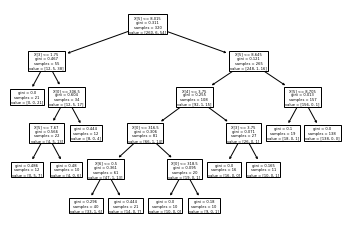

In [175]:
tree.plot_tree(decision_gradprama.fit(x_train, y_train)) 


# Visualisation

The decision tree intuintively will overfit on data if its allowed to reach  its max depth where each node is a leaf therefore, to get a good generalisation on the dataset, we have to contraint the decision tree using its own parameters which can be

using: 

MaxDepth - to control the size of the tree to prevent overfitting.
min_samples_split or min_samples_leaf - ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered

However, before we explore these parameters lets look at how the tree looks like


In [176]:
import graphviz
import os
os.environ["PATH"] += os.pathsep +  'C:/Users/Darman/Downloads/graphviz-2.38/release/bin'


In [177]:
dot_data = tree.export_graphviz(decision_gradprama, out_file=None, 
                    feature_names=x.columns,  
                      class_names=group_labels,  
                      filled=True, rounded=True,  
                      special_characters=True)  

In [178]:
graph = graphviz.Source(dot_data)

In [188]:
graph.render('dtree_render', view= True)

'dtree_render.pdf'

In [180]:
predictions = decision_gradprama.predict(x_train)

In [181]:
df1 = pd.DataFrame(list(predictions))


In [182]:
y_train = y_train.reset_index(drop=True)

In [183]:
df1.rename(columns={  0 : "Chance of Admit label"})

,Chance of Admit label
0,high
1,high
2,high
3,high
4,high
...,...
315,high
316,high
317,medium
318,high


In [184]:
train_accuracy = np.sum(df1.values == y_train.values) / float(df1.size)

In [185]:
 test_accuracy = np.sum(pd.DataFrame(list(decision_gradprama.predict(x_test))).values == y_test.values) / float(y_test.size)

In [186]:
print('training accuracy: ' + (train_accuracy * 100).astype(str) + '%')
print('test accuracy: ' + (test_accuracy * 100).astype(str) + '%')

training accuracy: 90.625%
test accuracy: 91.25%


# Conclusion

When a basic decision tree is built the accuracy on the training data = 100% whereas the testing set had a accuracy of 80%  which showed charactristics  of overfitting. By using the metrics max_depth = 5, min_samples_split = 10, min_samples_leaf = 10 we explicitly told the decision tree to go to a depth of 5, only split when the count of samples is 10 and if the parent leaf contains 11 or more split. we concluded a 90% and 91% accuracy respectively

Interestingly, from the graph we can conclude that there were no paths that reached the conclusion of medium, this may be seen as a good thing from the perspective of admittance, you'd rather be classified as either having a chance or not. From another prespective the decision tree has a lot of paths that reach low addmitance chance which can also be seen as a worrying sign of sample frequency. This may mean that the splitting point for the bins has to be finally tuned